# Simulating Data and with Monte Carlo Methods

In the previous chapter, we introduced you to the foundations of random sampling and hacker statistics using `numpy`'s random number generator. 

In this chapter, we'll use Monte Carlo simulation to see how wildly applicable these techniques and distributions are to many concepts and problems in statistics and basic science, from diffusion and drift, to approximations of the Normal distribution, to the cognitive bias considerations of the Law of Small Numbers and selection bias, not to mention approximating $\pi$.


## Monte Carlo simulations to model all types of phemonema

In the next chapter, we'll be meeting a large variety of distributions, along with their data-generating processes and stories. We'll also learn to simulate them using analogous techniques to those we learnt above. Before that, we want to demonstrate just how powerful the techniques you've just learnt really are by showing an array of other questions you answer using the power of simulation. To begin, let's look at the well-known field of Monte Carlo simulations.

> Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. -- [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)

### Estimating $\pi$

As a first example, let's use our sampling techniques to approximate $\pi$, a question that has occupied our cultural consciousness since the ancients were thinking about it! To do this, consider two shapes: (1) a circle with radius 1 and centre the origin and (2) a square with the same diameter around the circle. Notice two things:

- The area of the circle is $\pi$,
- The area of the square is $4$.

This means that the $\pi$ is equal to 4 times the area of the circle divided by the area of the circle.

So: if we randomly populate the square with points and then count what fraction of them are in the circle (and multiply the result by 4), we'll be able to approximate $\pi$. So let's do it!


In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()



In [2]:
rng = np.random.default_rng(42)
N = 10**5 #number of points

# Generate x, y coordinates
x = 2*rng.random(N) - 1
y = 2*rng.random(N) - 1

# Calculate pi
4*sum(x**2 + y**2 <= 1)/N

3.14308

Voila! We have calculated $\pi$ correctly to 3 significant figures. You can play around with the number of points yourself for increased precision.

### Random walks

A random walk is a common model across many disciplines, most notably in physics, biology, and finance. It is used to model the motion of bacteria, heat diffusion, and share prices. With the techniques already learnt, we're able to simulate random walks!

The model is defined as follows: we start at position 0 and, at discrete uniform time intervals, we either move left or right 1 unit, each with probability 0.5. First note that each choice of left or right is given by a Bernoulli trial. Then notice that, in order to find the location at any time point $t$, you need to take the sum of all previous coin flips. Let's now simulate it and plot the random walk:

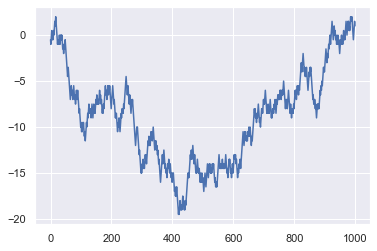

In [3]:
x = rng.binomial(1, 0.5, 1000) - 0.5
t = np.cumsum(x)
plt.plot(t);

#### A brief aside on the quincunx or the Galton board

In the next chapter, we'll spend more time with the Gaussian (or Normal) distribution but, since we're having so much fun sampling, it's worth using our new tools to show how the it's related to the binomial distribution. When our sample size $N$ is large enough, the binomial distribution in fact approximates the normal distribution.

19th century statistician Francis Galton, in fact, built a [mechanical device](https://en.wikipedia.org/wiki/Bean_machine) that demonstrated this and we'll simulate it here. In brief, one would drop beads into the board and each bead would hit a series of pegs. Each time a bead would hit a peg it would bounce either right or left and after a certain number of pegs, it would land at the bottom. if this sounds like the random walk model we just met above, that's because that's exactly what it is. 



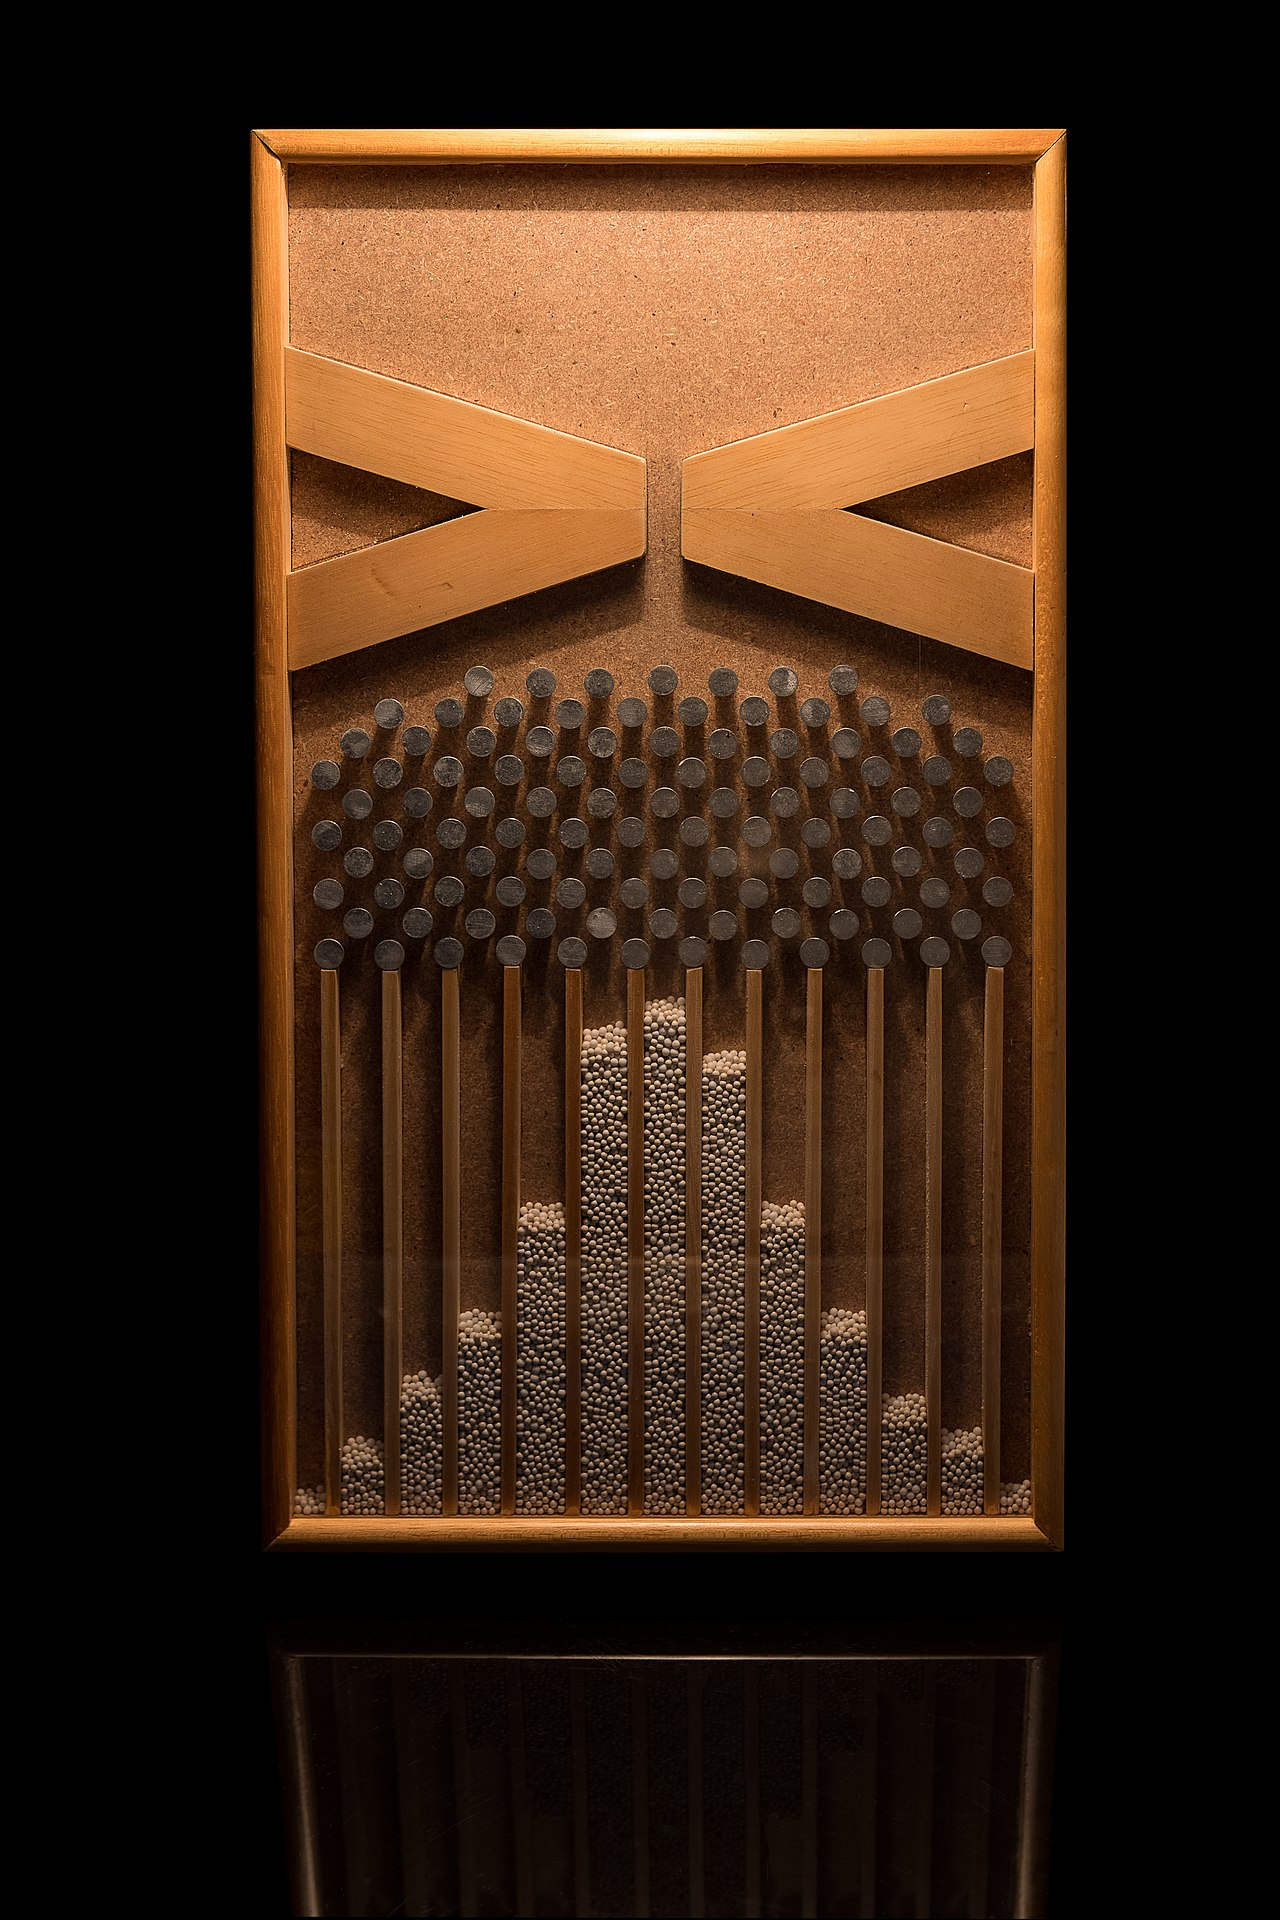

In [4]:
#| echo: false
from IPython.display import Image
Image("../../img/Galton_box.jpg")

Before we simulate the Galton board and plot the results, let's think through what to expect. Because each bead at each peg has an equal probability of going left or right, most of the beads will go left and right around the same number of times. This means that a lot of beads will stay around 0, the centre, and there will be less and less the further we get from the centre. Also due to the equal probabilities of left and right, the distribution will be symmetric around the centre. With this in mind, let's now simulate the quincunx and plot the result:

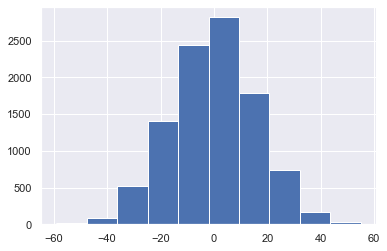

In [5]:
data = []
for _ in range(0, 10000):
    x = rng.binomial(1, 0.5, 1000) - 0.5
    t = sum(x)
    data.append(t)
plt.hist(data);

### Drift + diffusion

As mentioned above, the random walk is used to model the process of diffusion. However, for many phenomena, diffusion isn't quite enough and we also need to account for drift, such as bacteria climbing a chemical gradient, the current in semiconductors, and stock prices that on average aren't stationary over time. What this essentially means is that we have a diffusion component, described by a random walk, and a drift component, which means we're tending in a particular direction. If we're drifting to the left (down), we can simulate this by making the probability less than 0.5:

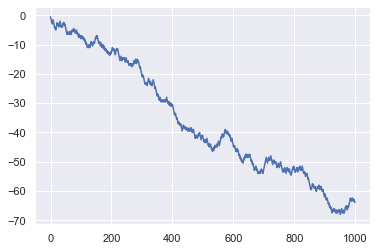

In [6]:
x = rng.binomial(1, 0.45, 1000) - 0.5
t = np.cumsum(x)
plt.plot(t);

If we're drifting to the right (up), we can simulate this by making the probability greater than 0.5:

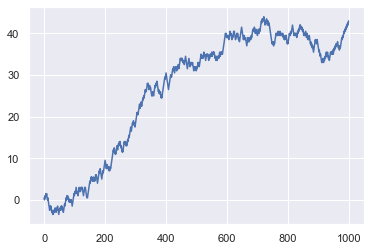

In [7]:
x = rng.binomial(1, 0.55, 1000) - 0.5
t = np.cumsum(x)
plt.plot(t);

### Investors, coincidences, and survivorship bias

Now we come to a particularly fun example, a variation on one described by Nassim Nicholas Taleb in his book [Fooled by Randomness](https://en.wikipedia.org/wiki/Fooled_by_Randomness). One of the reasons this example is fun is that it illustrates the very real problem of survivorship bias in a concrete way and we also get to simulate it!

Our thought experiment, based on Taleb's, involves a population of 10,000 investment managers who are investing such that, with each investment, each manager has a 50% chance of winning 10K and a 50% chance of losing 10K. Each manager starts with 10K and once a manager has 0 USD, they are thrown out of the sample because they have no more money to invest with any more. What we'll see, when simulating this is that, even after thousands of bets, there will be some managers left and others quite wealthy, given that we started with enough managers. We may be tempted to believe that they were talented and may know some secret sauce about the investment world, but the truth is that they were just lucky. Once again, each investment manaager is going on a random walk and we'll plot only those who survive (hence the term **survivorship bias**).

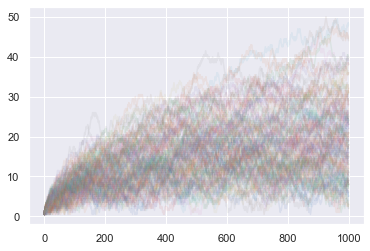

In [8]:
for _ in range(0, 10000):
    x = rng.binomial(1, 0.5, 1000) - 0.5
    t = np.cumsum(x)
    if (t > 0).all():
        plt.plot(t, alpha=0.1)

### The Law of Small Numbers

Before moving on to the panoply of probability distributions and their stories, one more example is in order, as it demonstrates another statistical bias we have, _the Law of Small Numbers_. This is one of many that you can find ih Kahneman and Tversky's seminal work of behavioural economics [Thinking Fast and Slow](https://en.wikipedia.org/wiki/Thinking,_Fast_and_Slow).

The authors tell us of a study of kidney cancer incidence across over 3,000 counties in the US and they mention that those with a low incidence rate are 'sparsely populated, and located in traditionally Republican states in the Midwest, the South, and the West.' They then ask what the reader makes of this and propose a few suggestions, which we presume you can approximate.

But then, they also tell us that those with a high incidence rate are also 'sparsely populated, and located in traditionally Republican states in the Midwest, the South, and the West!' They also propose some reasons why this may be the case.

The punchline is that there is not necessarily any causal relation between (1) counties being sparsely populated and traditionally Republican and (2) kidney cancer incidence in those counties. What is, in fact, happeneing is that we are seeing more extreme values due to smaller populations in those counties. _This_ is the Law of Small Numbers: the less samples you have, the greater the chance of seeing extreme values.

To make this quantitatively precise, Kahneman and Tversky provide a toy example, which we'll simulate in a minute. Consider an urn filled with marbles, half of which are red and half of which are black. Jack and Jill take turns in drawing marbles and replacing them. Each turn, Jack draws 4 marbles and Jill draws 7. To quote the authors, 

> If they go on long enough, Jack will observe such extreme outcomes more often than Jill—by
a factor of 8 (the expected percentages are 12.5% and 1.56%). Again, no
hammer, no causation, but a mathematical fact: samples of 4 marbles
yield extreme results more often than samples of 7 marbles do.
Now imagine the population of the United States as marbles in a giant
urn. Some marbles are marked KC, for kidney cancer. You draw samples
of marbles and populate each county in turn. Rural samples are smaller
than  other  samples.  Just  as  in  the  game  of  Jack  and  Jill,  extreme
outcomes (very high and/or very low cancer rates) are most likely to be
found in sparsely populated counties. This is all there is to the story.




We now simulate the above to see if it checks out with our new random sampling skills!

In [9]:
# Simulate Jack
samples = 10**3
jack = rng.binomial(4,0.5,samples)
# How many times does Jack draw 0 or 4 white marbles?
sum(jack==0) + sum(jack==4)

134

In [10]:
# Simulate Jill
samples = 10**3
jill = rng.binomial(7,0.5,samples)
# How many times does Jack draw 0 or 7 white marbles?
sum(jill==0) + sum(jill==7)

27

We indeed see that Jack draws all red or all black marbles approximately 6 times as often as Jill does and we've demonstrated the Law of Small Numbers using our random sampling skills.

## Wrapping up

In this chapter, we have used Monte Carlo simulation to see how wildly applicable these techniques and distributions are to many concepts and problems in statistics and basic science, from diffusion and drift, to approximations of the Normal distribution, to the cognitive bias considerations of the Law of Small Numbers and selection bias, not to mention approximating $\pi$.

In the next chapter, we'll make a brief excursion to the empirical cumulative distribution function (ECDF), the histogram's more sophisticated cousin, and then we'll jump straight into the zoo of probability distributions and their stories.